<a href="https://colab.research.google.com/github/anavianascientist/Machine_Learning/blob/master/naive_bayes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Algoritmo Naive Bayes

Um dos modelos de Rede Bayesianos mais simples.
Não supervisionado.
Uma família de classificadores probabilísticos "simples" baseados na aplicação do teorema de Bayes, com fortes pressupostos de independência entre os recursos.

In [1]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
import io

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Carregamento da base de dados e definição dos previsores (variáveis independentes - X) e a classe (variável dependente - y)
from google.colab import files 
uploaded = files.upload()


Saving Credit.csv to Credit.csv


In [6]:
credito = pd.read_csv(io.BytesIO(uploaded['Credit.csv']))
credito.shape

(1000, 21)

In [7]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [8]:
# Formato de matriz
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [9]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [10]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [11]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [13]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [15]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

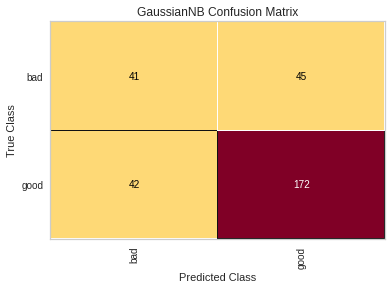

In [23]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [17]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
from google.colab import files 
uploaded = files.upload()


Saving NovoCredit.csv to NovoCredit.csv


In [19]:
#novo_credito
novo_credito = pd.read_csv(io.BytesIO(uploaded['NovoCredit.csv']))
novo_credito.shape


(1, 20)

In [20]:
novo_credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [21]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método "transform", pois a adaptação aos dados (fit) já foi feita anteriormente
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])

In [22]:
# Resultado da previsão
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')